# Advanced Statistic -- Exercize Sheet 7

Valente Alessandro 1234429


## Ex.1


A researcher has collected n = 15 observations that are supposed to come from a Normal distribution
with known variance $\sigma^2=16 $:

 $
 \begin{matrix}
26.8 & 26.3 & 28.3 & 28.5 & 16.3 \\
31.9 & 28.5 & 27.2 & 20.9 & 27.5 \\
28.0 & 18.6 & 22.3 & 25.0 & 31.5 \\
\end{matrix}
$


Assuming a normal prior for $\mu$ , Norm(m = 20, s2 = 25),

**(a)** determine the posterior distribution $P(\mu| y_1 \dots y_{15})$ and find the posterior mean and standard
deviation

We know that assuming a normal prior and a normal likelihood:
$$
g(\mu | m, s) \propto \exp \left[-\frac{1}{2 s^{2}}(y-m)^{2}\right]\qquad
f(y|\mu,\sigma) = \prod_{j} \frac{1}{\sigma \sqrt{2 \pi}} \exp \left[\frac{\left(y_{j}-m \right)^{2}}{2 \sigma^{2}}\right]$$

the posterior will also be a normal distribution with mean and variance:
$$\frac{1}{\left(s^{\prime}\right)^{2}}=\frac{\sigma^{2}+n s^{2}}{\sigma^{2} s^{2}} \quad \text { and } \quad m^{\prime}=\frac{1 / s^{2}}{n / \sigma^{2}+1 / s^{2}} m+\frac{n / \sigma^{2}}{n / \sigma^{2}+1 / s^{2}} \bar{y}$$

In [1]:
obs= c(26.8, 26.3, 28.3, 28.5, 16.3,31.9, 28.5, 27.2, 20.9, 27.5,28.0, 18.6, 22.3, 25.0, 31.5)

m_prior <- 20; s2_prior <- 25 #mean and sigma square of the prior
s2_like <- 16 #likelihood variance
n<- length(obs)
y_bar <- sum(obs)/n #mean of observeations
#posterior parameteres
s2_post <- s2_like*s2_prior/(s2_like+n*s2_prior)
m_post <- (1/s2_prior)/(n/s2_like +1/s2_prior)*m_prior+
          (n/s2_like) /(n/s2_like +1/s2_prior)*y_bar
print("Posterior distriubtion:") 
print(paste("Mean:", round(m_post,2 )))
print(paste("s^2 :", round(s2_post,2)))



[1] "Posterior distriubtion:"
[1] "Mean: 25.6"
[1] "s^2 : 1.02"


**(b)** find the 95% credibility interval for µ

The posterior is a normal distribution, in particular we know that for a normal distribution the following expression holds:

$$P\left(\left|\theta-\theta_{0}\right| \leq 2 \sigma | D M\right) \sim 0.95$$

In our case it can be written as

$$P (\left|\mu-m'\right| \leq 2 s') \sim 0.95$$

In this way we can compute the credibility interval from the parameters we estimated before:

In [2]:
u_low <- m_post - 2*sqrt(s2_post); u_high <- m_post + 2*sqrt(s2_post);
print("Posterior distribution:")
print(paste("credibility interval: [", round(u_low,2), ",",round(u_high,2),"]"))

[1] "Posterior distribution:"
[1] "credibility interval: [ 23.58 , 27.62 ]"


**(c)** plot the posterior distribution, indicating on the same plot: the mean value, the standard deviation,
and the 95% credibility interval

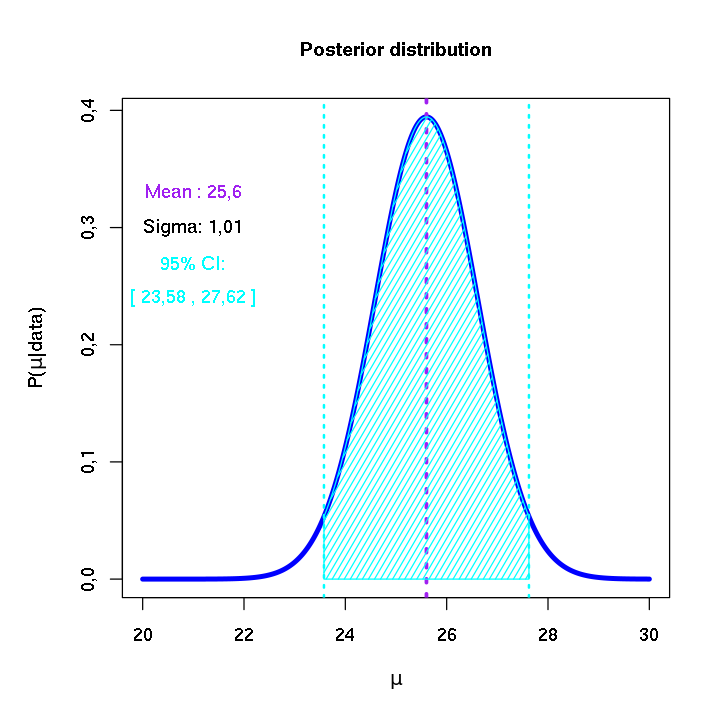

In [3]:
x <- seq(20,30, 0.001)
par(cex.lab=1, cex.axis=1, cex.main=1, mar=c(5, 5, 4, 2) + 0.1)
options(repr.plot.width=6,repr.plot.height=6)

plot(x, dnorm(x, m_post, sqrt(s2_post)), type='l', col='blue', lwd=4,
    xlab=expression(mu), ylab=expression(paste("P(",mu,"|data)")), main="Posterior distribution")
abline(v=u_high, col='cyan', lwd=2, lty='dotted')
abline(v=u_low , col='cyan', lwd=2, lty='dotted')
abline(v=m_post, col='purple', lwd=3, lty='dotted')
pol <- seq(u_low, u_high, 0.001)
polygon(  c(u_low,pol,u_high), 
          c(0,dnorm(pol, m_post, sqrt(s2_post)),0), col='cyan', density=20, angle=60  )
text(21, 0.33, paste("Mean :", round(m_post,2)), col='purple')
text(21, 0.30, paste("Sigma:", round(sqrt(s2_post),2)))
text(21, 0.27, "95% CI:", col='cyan')
text(21, 0.24, paste("[", round(u_low,2), ",",round(u_high,2),"]"), col='cyan')


**(d)** repeat the analysis using a different prior Norm(m = 30, s2 = 16) and plot, on the same graph the
likelihood, the prior and the posterior.

Repeating the analysis we arrive at the following results:

In [4]:
obs= c(26.8, 26.3, 28.3, 28.5, 16.3,31.9, 28.5, 27.2, 20.9, 27.5,28.0, 18.6, 22.3, 25.0, 31.5)

m_prior2 <- 30; s2_prior2 <- 16 #mean and sigma square of the prior
#posterior parameteres
s2_post2 <- s2_like*s2_prior2/(s2_like+n*s2_prior2)
m_post2 <- (1/s2_prior2)/(n/s2_like +1/s2_prior2)*m_prior2+
           (n/s2_like)  /(n/s2_like +1/s2_prior2)*y_bar
u_low2 <- m_post2 - 2*sqrt(s2_post2); u_high2 <- m_post2 + 2*sqrt(s2_post2);
print("Posterior distriubtion:") 
print(paste("Mean:", round(m_post2,2 )))
print(paste("s^2 :", round(s2_post2,2)))
print(paste("credibility interval: [", round(u_low2,2), ",",round(u_high2,2),"]"))

[1] "Posterior distriubtion:"
[1] "Mean: 26,1"
[1] "s^2 : 1"
[1] "credibility interval: [ 24,1 , 28,1 ]"


This results can be summarized in the following graphs

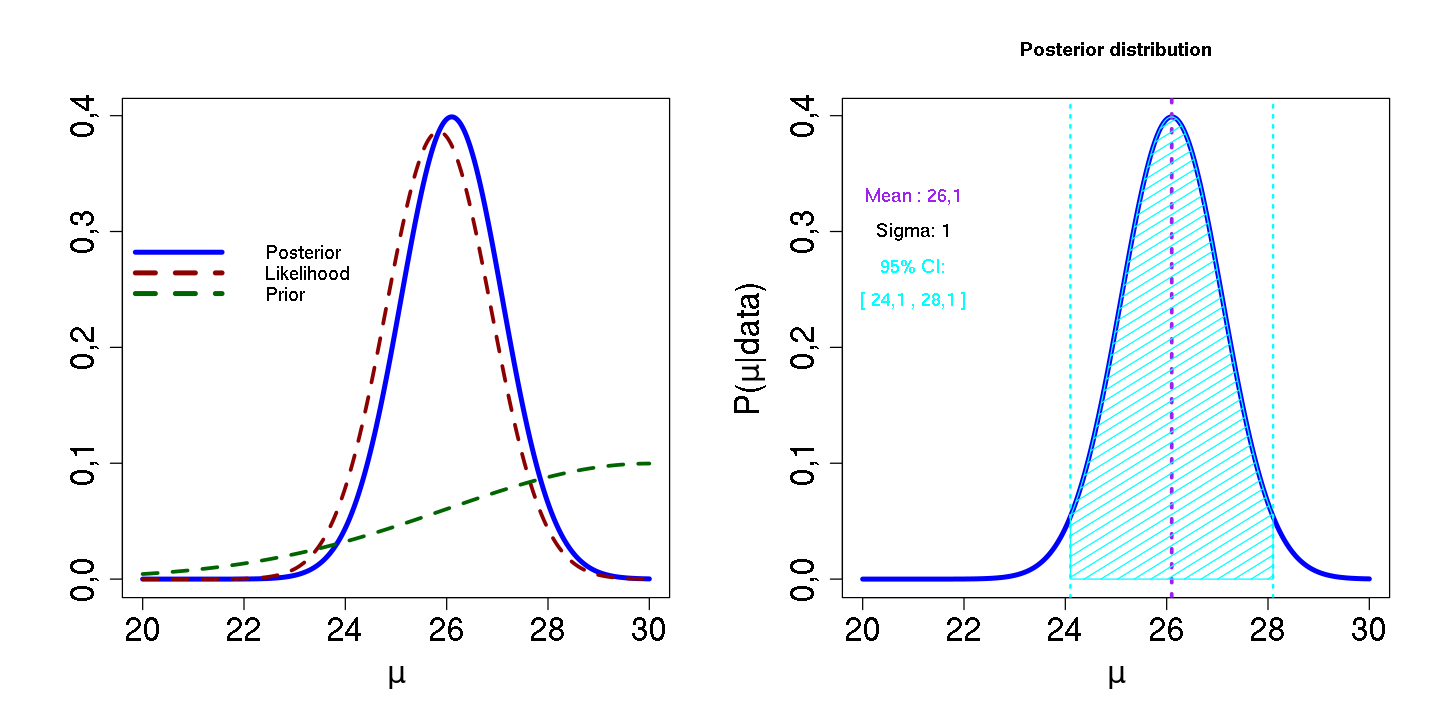

In [5]:
par(cex.lab=1.5, cex.axis=1.5, cex.main=1, mar=c(5, 5, 4, 2) + 0.1)
options(repr.plot.width=12,repr.plot.height=6)
area <- matrix (c(1,2), nrow=1, ncol=2, byrow=TRUE)
layout(area)

x <- seq(20,30, 0.001)
li <- rep(1.0, length(x))
for (ob in obs){
    li <- li* dnorm(ob, x, sqrt(s2_like))
}
li <- li/(sum(li*0.001))
plot(x, dnorm(x, m_post2, sqrt(s2_post2)), type='l', col='blue', lwd=4, 
     xlab=expression(mu), ylab="", main="")
lines(x, li, type='l', col='dark red', lty='dashed', lwd=3)
lines(x, dnorm(x, m_prior2, sqrt(s2_prior2)), type='l', col='dark green', lty='dashed', lwd=3)
legend(19, 0.3, legend=c("Posterior", "Likelihood", "Prior"),  col=c('blue',  'dark red','dark green'),  
       lty=c('solid','dashed', 'dashed'), lwd=4, bty='n',y.intersp=1)

par(cex.lab=1.5, cex.axis=1.5, cex.main=1, mar=c(5, 5, 4, 2) + 0.1)
plot(x, dnorm(x, m_post2, sqrt(s2_post2)), type='l', col='blue', lwd=4, 
    xlab=expression(mu), ylab=expression(paste("P(",mu,"|data)")), main="Posterior distribution")
abline(v=u_high2, col='cyan', lwd=2, lty='dotted')
abline(v=u_low2 , col='cyan', lwd=2, lty='dotted')
abline(v=m_post2, col='purple', lwd=3, lty='dotted')
pol <- seq(u_low2, u_high2, 0.001)
polygon(  c(u_low2,pol,u_high2), 
          c(0,dnorm(pol, m_post2, sqrt(s2_post2)),0), col='cyan', density=20, angle=60  )
text(21, 0.33, paste("Mean :", round(m_post2,2)), col='purple')
text(21, 0.30, paste("Sigma:", round(sqrt(s2_post2),2)))
text(21, 0.27, "95% CI:", col='cyan')
text(21, 0.24, paste("[", round(u_low2,2), ",",round(u_high2,2),"]"), col='cyan')


**(e)** compare the credibility intervals obtained with the two priors

The credibility intervals obtained with the two priors are:

In [6]:
print("Prior: Norm(m=20, s2=25)")
print(paste("Mean:", round(m_post,2 )))
print(paste("credibility interval: [", round(u_low,2), ",",round(u_high,2),"]"))
print("Prior: Norm(m=30, s2=16)")
print(paste("Mean:", round(m_post2,2 )))
print(paste("credibility interval: [", round(u_low2,2), ",",round(u_high2,2),"]"))

[1] "Prior: Norm(m=20, s2=25)"
[1] "Mean: 25,6"
[1] "credibility interval: [ 23,58 , 27,62 ]"
[1] "Prior: Norm(m=30, s2=16)"
[1] "Mean: 26,1"
[1] "credibility interval: [ 24,1 , 28,1 ]"


As expected the diffence in the result is little despite having a big difference in the prior parameters (especially the mean) this is beacuse having a sufficient number of measurement makes the posterior "less dependent" from the prior distribution, but the effect is still clearly visible in fact the second prior which has an higher mean and a smaller variance produced a tighter credibility interval centered at an higher value

## EX.2

A researcher has collected n = 16 observations that are supposed to come from a Normal distribution
with known variance $\sigma^2 = 4$

$
\begin{matrix}
4.09 & 4.68 & 1.87 & 2.62 & 5.58 & 8.68 & 4.07 & 4.78 \\
4.79 & 4.49 & 5.85 & 5.09 & 2.40 & 6.27 & 6.30 & 4.47 \\
\end{matrix} 
$

Assuming the prior is a step funtion:
$$g(\mu)=\left\{\begin{array}{ll}
\mu & \text { for } 0<\mu \leq 3 \\
3 & \text { for } 3<\mu \leq 5 \\
8-\mu & \text { for } 5<\mu \leq 8 \\
0 & \text { for } \mu>8
\end{array}\right.$$

**(a)** find the posterior distribution, the posterior mean and standard deviation

The prior distribution is not normalized so at first we have to compute it's integral to obtain a normalization factor. Once this is done we can compute the posterior distibution as the product of the likelihood and the prior distribution, this is done numerically by multiplying the respective vector and then normalizing the result.
The required quantities can then be computed as
$$\mu=E[X]=\int_{-\infty}^{\infty} x f(x) d x$$
$$\operatorname{Var}(X)=\sigma^{2}=E\left[(X-\mu)^{2}\right]=\int_{\mathbb{R}}(x-\mu)^{2} f(x) d x$$

where the integrals are not done analytically but computed numerically

In [7]:
obs= c(4.09, 4.79, 4.68, 4.49, 1.87, 5.85, 2.62, 5.09, 5.58, 
       2.40, 8.68, 6.27, 4.07, 6.30, 4.78, 4.47)
s2l <- 4; n <- 16

#prior distribution
step <- 0.001
mu <- seq(0,8,step)
prior <- function(x){
    ifelse(x<0, 0, 
    ifelse(x<=3, x,
    ifelse(x<=5, 3,
    ifelse(x<=8, 8-x, 0))))
}
c_prior <- integrate(prior, 0,8)$value
li <- rep(1.0, length(mu))
for (ob in obs){
    li <- li* dnorm(ob, mu, sqrt(s2l))
}
dist_like <- li/(sum(li*step))
dist_prior <- prior(mu)/c_prior
post <- dist_like*dist_prior
dist_post <- post/(sum(post)*0.001)

mu_mean <- sum(mu*dist_post*step)
mu_var  <- sum((mu-mu_mean)^2*dist_post*step)

print(paste("Mean: ", round(mu_mean,2)))
print(paste("Sigma:", round(sqrt(mu_var) ,2)))

[1] "Mean:  4,73"
[1] "Sigma: 0,48"


**(b)** find the 95% credibility interval for µ

From the plot of the posterior distribution which is shown below it is clear that we can use the normal approximation to compute the 95% credibility interval, as before we then now that for a normal distribution
$$P (\left|\mu-m\right| \leq 2 s) \sim 0.95$$


In [8]:
mu_low <- mu_mean-2*sqrt(mu_var); mu_high <- mu_mean+2*sqrt(mu_var)
print(paste("credibility interval: [", round(mu_low,2), ",",round(mu_high,2),"]"))

[1] "credibility interval: [ 3,76 , 5,69 ]"


**(c)** plot the posterior distribution, indicating on the same plot: the mean value, the standard deviation,
and the $95\%$ credibility interval

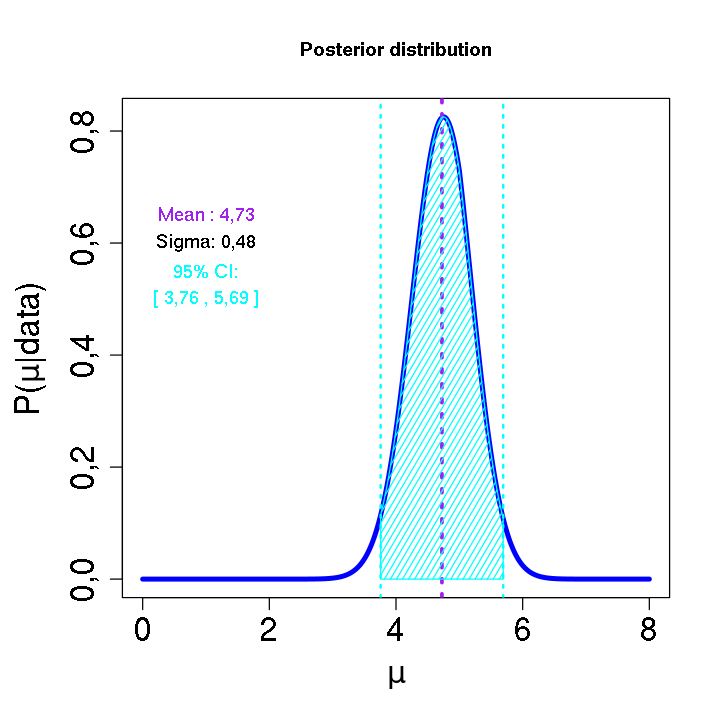

In [9]:
par(cex.lab=1.5, cex.axis=1.5, cex.main=1, mar=c(5, 5, 4, 2) + 0.1)
options(repr.plot.width=6,repr.plot.height=6)

plot(mu, dist_post, type='l', col='blue', lwd=4, 
    xlab=expression(mu), ylab=expression(paste("P(",mu,"|data)")), main="Posterior distribution")
abline(v=mu_high, col='cyan', lwd=2, lty='dotted')
abline(v=mu_low , col='cyan', lwd=2, lty='dotted')
abline(v=mu_mean, col='purple', lwd=3, lty='dotted')
#pol <- seq(mu_low, mu_high, step)
polygon(  c(mu_low,mu[which(mu>mu_low)[1]:tail(which(mu<mu_high),1)],mu_high), 
          c(0,dist_post[which(mu>mu_low)[1]:tail(which(mu<mu_high),1)],0), col='cyan', density=20, angle=60  )


text(1, 0.65, paste("Mean :", round(mu_mean,2)), col='purple')
text(1, 0.60, paste("Sigma:", round(sqrt(mu_var),2)))
text(1, 0.55, "95% CI:", col='cyan')
text(1, 0.50, paste("[", round(mu_low,2), ",",round(mu_high,2),"]"), col='cyan')


**(d)** plot, on the same graph, the prior, the likelihood and the posterior distribution

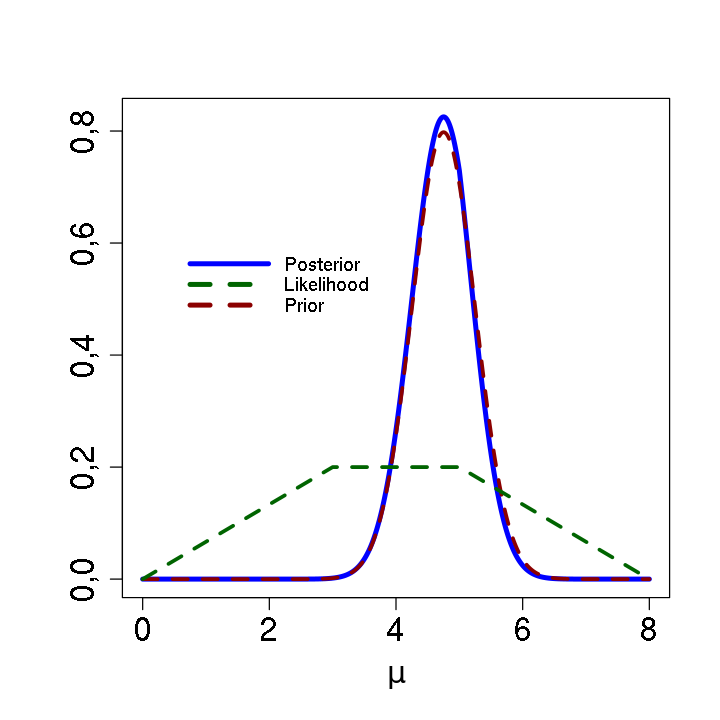

In [10]:
par(cex.lab=1.5, cex.axis=1.5, cex.main=1, mar=c(5, 5, 4, 2) + 0.1)
options(repr.plot.width=6,repr.plot.height=6)

plot(mu, dist_post, type='l', col='blue', lwd=4, 
     xlab=expression(mu), ylab="", main="")
lines(mu, dist_like, type='l', col='dark red', lty='dashed', lwd=3)
lines(mu, dist_prior, type='l', col='dark green', lty='dashed', lwd=3)
legend(0.5, 0.6, legend=c("Posterior", "Likelihood", "Prior"),  col=c('blue', 'dark green', 'dark red'),  
       lty=c('solid','dashed', 'dashed'), lwd=4, bty='n',y.intersp=1, seg.len=5)




## Ex.3
A study on water quality of streams, a high level of bacter X was defined as a level greater than 100
per 100 ml of stream water. $n = 116$ samples were taken from streams having a high environmental
impact on pandas. Out of these, $y = 11 $ had a high bacter X level.

Indicating with p the probability that a sample of water taken from the stream has a high bacter
X level,

**(a)** find the frequentist estimator for p

Assuming that the presence of a high bacter level in a sample is a Bernoulli process we obtain as frequentist estimator:

$$ \hat{p}_F=\frac{y}{n} $$

In [11]:
n <- 116 #n total
y <- 11 # high level bacteria

pf <- y/n

print(paste("Frequentist estimator, P:", round(pf,3)))

[1] "Frequentist estimator, P: 0,095"


**(b)** using a Beta(1, 10) prior for p, calculate and posterior distribution $P(p |y)$

Using a binomial distribution as the likelihood we have that, since the prior is a Beta($\alpha ,\beta$) distribution, taht the prior and posterior distributions are conjugated, in particular the posterior  is a Beta distribution itself: Beta($\alpha ', \beta '$).

Where the parameters of the posterior are computed as: 
$$ \alpha^{\prime} =\alpha+y \quad\text { and }\quad \beta^{\prime}=\beta+n-y $$

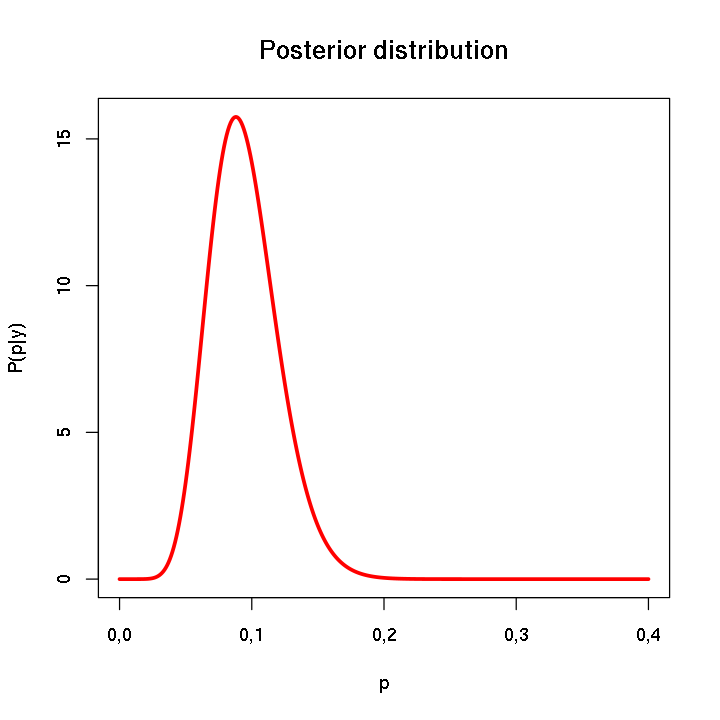

In [12]:
a <- 1; b <- 10 #shapes of beta distribution
a1 <- a+y
b1 <- b+n-y
p <- seq(0,0.4,0.001)
plot (p, dbeta(p, a1,b1), type='l', col='red', lwd=3,
      main="Posterior distribution", xlab="p", ylab="P(p|y)")


**(c)** find the bayesian estimator for p, the posterior mean and variance, and a 95% credible interval

Given that the posterior distribution in a Beta function:  Beta($\alpha ', \beta '$), we have that, the distribution mean and variance are respectively:

$$ m'=\frac{\alpha '}{\alpha '+\beta'} \qquad   \sigma^2=\frac{\alpha' \beta'}{(\alpha'+\beta')^{2}(\alpha'+\beta'+1)}$$

In the normal approximation the mean of the distribution is the Bayesian estimation for p:
$$\hat{p}_B=m'=\frac{\alpha '}{\alpha '+\beta'} $$
while the 95% credibility interval can be computed knowing that for a normal distribution
$$P\left(\left|\theta-\theta_{0}\right| \leq 2 \sigma | D M\right) \sim 0.95$$

Alternatively we can compute the confidence interval using the quantile function of the beta posterior.

[1] "Bayesian estimation:"
[1] "Most probable value: 0,094"
[1] "Variance: 0,001"
[1] "Credibility interval: [ 0,05 , 0,151 ]"
[1] "Credibility interval: [ 0,043 , 0,146 ] with normal approximation"


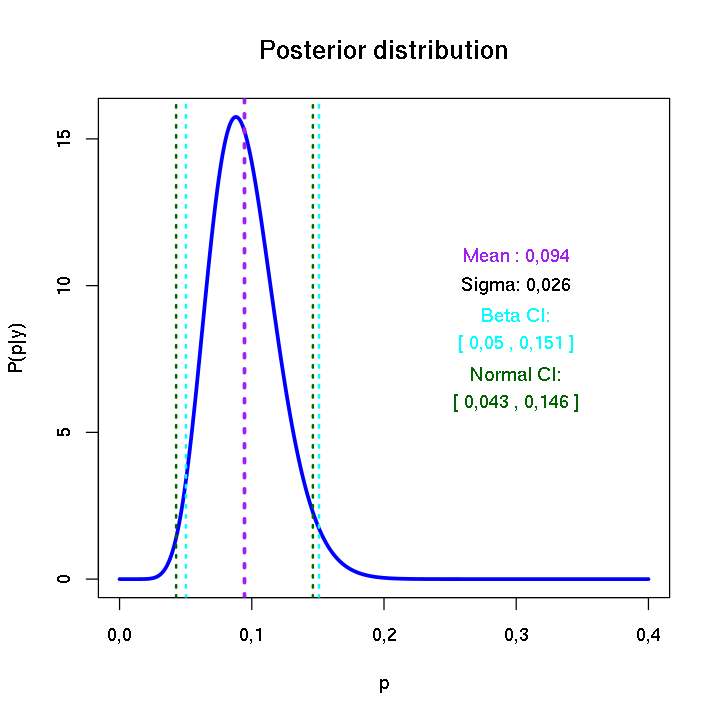

In [13]:

pb <- (a1)/(a1+b1) #posterior mean
var <- a1*b1/((a1+b1)^2*(a1+b1+1))
p_low <- qbeta(0.025, a1,b1)
p_high <- qbeta(0.975, a1,b1)
p_low_norm  <- pb-2*sqrt(var)
p_high_norm <- pb+2*sqrt(var)

print(paste("Bayesian estimation:"))
print(paste("Most probable value:", round(pb,3)))
print(paste("Variance:", round(var,3)))
print(paste("Credibility interval: [",round(p_low,3),",",round(p_high,3),"]"))
print(paste("Credibility interval: [",round(p_low_norm,3),",",round(p_high_norm,3),"] with normal approximation"))

plot(p, dbeta(p, a1,b1), type='l', col='blue', lwd=3,
      main="Posterior distribution", xlab="p", ylab="P(p|y)")
abline(v=p_high, col='cyan', lwd=2, lty='dotted')
abline(v=p_low , col='cyan', lwd=2, lty='dotted')
abline(v=p_high_norm, col='dark green', lwd=2, lty='dotted')
abline(v=p_low_norm , col='dark green', lwd=2, lty='dotted')
abline(v=pb, col='purple', lwd=3, lty='dotted')
#pol <- seq(p_low, p_high, 0.001)
#polygon(  c(p_low, pol ,p_high), 
#          c(0,dbeta(pol,a1,b1),0), col='cyan', density=20, angle=60  )


text(0.3, 11, paste("Mean :", round(pb,3)), col='purple')
text(0.3, 10, paste("Sigma:", round(sqrt(var),3)))
text(0.3, 9,  "Beta CI:", col='cyan')
text(0.3, 8,  paste("[", round(p_low,3), ",",round(p_high,3),"]"), col='cyan')
text(0.3, 7,  "Normal CI:", col='dark green')
text(0.3, 6,  paste("[", round(p_low_norm,3), ",",round(p_high_norm,3),"]"), col='dark green')


**(d)** test the hypotesis $ H_0 : p = 0.1$ versus $ H_1 : p \neq 0.1 $ at $5\%$ level of significance with both the frequentist and bayesian approach

Given the 2 hypotesis we have now to define, for the frequentist approach, the null distribution, which is a binomial distribution with probability given by the hypothesis, y: Binom$(y| n = 116, p=0.1)$. once this has been defined we can compute the y values corresponding to the required level of significance, considering that the distribution is discrete we will use the closest interval to the level.

On the other hand for the bayesian approach we have to observe if the $p_0$ value is comprehended in the credibility interval corresponding to the significance level required.

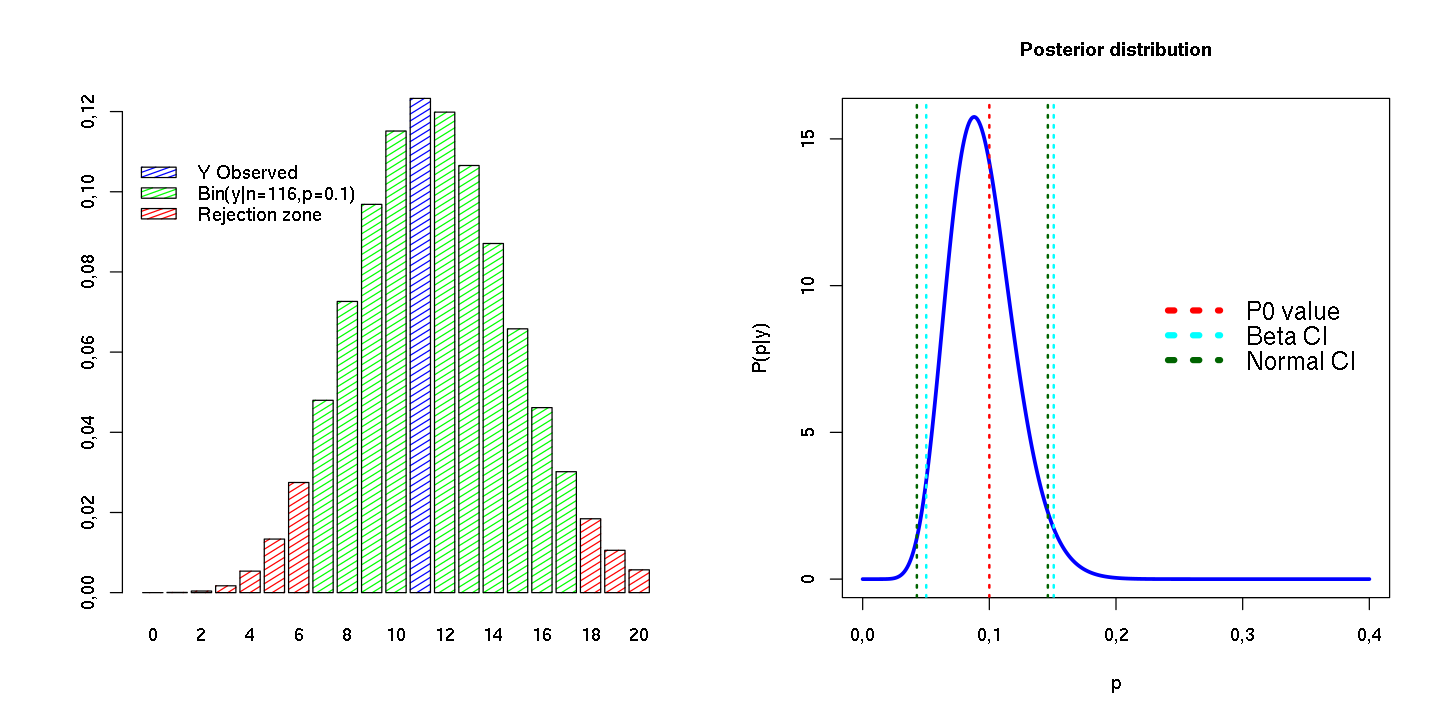

In [14]:
p0 <- 0.1
rej_low <-  qbinom(0.025, n, p0)
rej_high <- qbinom(0.975, n, p0)


plot_max <- 20
cols <- rep('green', plot_max+1) #i plot only up to 20
cols <- replace(cols, c(seq(1, rej_low+1,1), seq(rej_high+1, plot_max+1)), 'red')
cols <- replace(cols, y+1, 'blue')

par(cex.lab=1, cex.axis=1, cex.main=1, mar=c(5, 5, 4, 2) + 0.1)
options(repr.plot.width=12,repr.plot.height=6)
area <- matrix (c(1,2), nrow=1, ncol=2, byrow=TRUE)
layout(area)

ys <- seq(0,plot_max,1)
barplot(dbinom(ys, n, p0), names.arg=ys, col=cols, density=30, angle=60)
legend(-2,0.11, legend=c("Y Observed", "Bin(y|n=116,p=0.1)", "Rejection zone"),
       bty='n', fill=c('blue', 'green', 'red'), x.intersp=0.5, density=30 )

plot(p, dbeta(p, a1,b1), type='l', col='blue', lwd=3,
      main="Posterior distribution", xlab="p", ylab="P(p|y)")
abline(v=p_high, col='cyan', lwd=2, lty='dotted')
abline(v=p_low , col='cyan', lwd=2, lty='dotted')
abline(v=p_high_norm, col='dark green', lwd=2, lty='dotted')
abline(v=p_low_norm , col='dark green', lwd=2, lty='dotted')
abline(v=p0, col='red', lwd=2, lty='dotted')
legend(0.2, 10, legend=c("P0 value","Beta CI", "Normal CI"),
       bty='n', col=c('red', 'cyan', 'dark green'), lty='dotted', 
       cex=1.2, seg.len =1, lwd=5, x.intersp=0.5 )


As we can see for both the frequentist approach the value $p=0.1$ of the $H_0$ hypothesis lies within the acceptance region and the credibility interval respectively we therefore can not reject the hypothesis

A new measurement, performed one month later on $n = 165$ water samples, gives $y = 9$ high bacter
X level

**(e)** find the frequentist estimator for p

As for point **a)** the frequentist estimator is:
$$ \hat{p}_F=\frac{y}{n} $$

In [15]:
n <- 165 #n total
y <- 9 # high level bacteria

pf <- y/n

print(paste("Frequentist estimator, P:", round(pf,3)))

[1] "Frequentist estimator, P: 0,055"


**(f)** find a bayesian estimator for p, assuming both a Beta(1, 10) prior for p, and assuming the posterior
probability of the older measurement as the prior for the new one.

We can repeat the analysis done in point **b)** since in both cases the prior is a beta distribution, the posterior will therefore be a beta distribution itself in both cases.

The estimator will then be the mean of the posterior distribution.

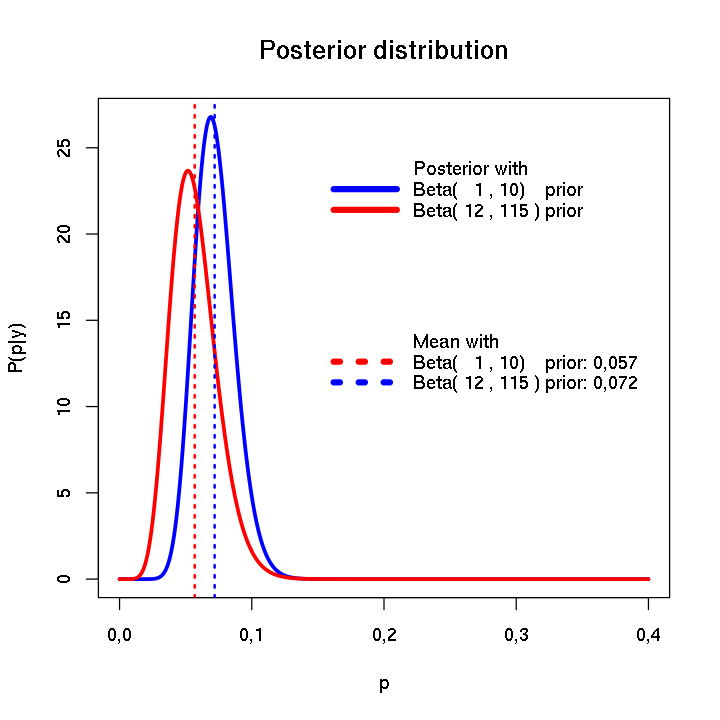

In [16]:
options(repr.plot.width=6,repr.plot.height=6)
a <-1; b<-10;

a_beta <- a +y ; b_beta <- b +n-y ;
a_post <- a1+y ; b_post <- b1+n-y ;
m_beta <- a_beta/(a_beta+b_beta)
m_post <- a_post/(a_post+b_post)

p <- seq(0,0.4,0.001)
plot (p, dbeta(p, a_post,b_post), type='l', col='blue', lwd=3,
      main="Posterior distribution", xlab="p", ylab="P(p|y)")
lines(p, dbeta(p, a_beta,b_beta), type='l', col='red', lwd=3,
      main="Posterior distribution", xlab="p", ylab="P(p|y)")
abline(v=m_beta, col='red' , lwd=2, lty='dotted')
abline(v=m_post, col='blue', lwd=2, lty='dotted')
legend(0.15, 25, legend=c("Posterior with","Beta(   1 , 10)    prior",paste("Beta(",a1,",",b1,") prior")),
       bty='n', col=c('red', 'blue'), lty='solid', 
       cex=1, seg.len =4, lwd=c(0,5,5), x.intersp=1 )
legend(0.15, 15, legend=c("Mean with",
        paste("Beta(   1 , 10)    prior:",round(m_beta,3)),
        paste("Beta(",a1,",",b1,") prior:",round(m_post,3))),
       bty='n', col=c("red",'red', 'blue'), lty='dotted', 
       cex=1, seg.len =4, lwd=c(0,5,5), x.intersp=1 )



**(g)** find the bayesian estimator for p, the posterior mean and variance, and a $95\%$ credible interval

As in point **c)** we will estimate the mean and variance of the posterior since we know their analytical form and from them the credibility interval, both with and without the normal approximation 

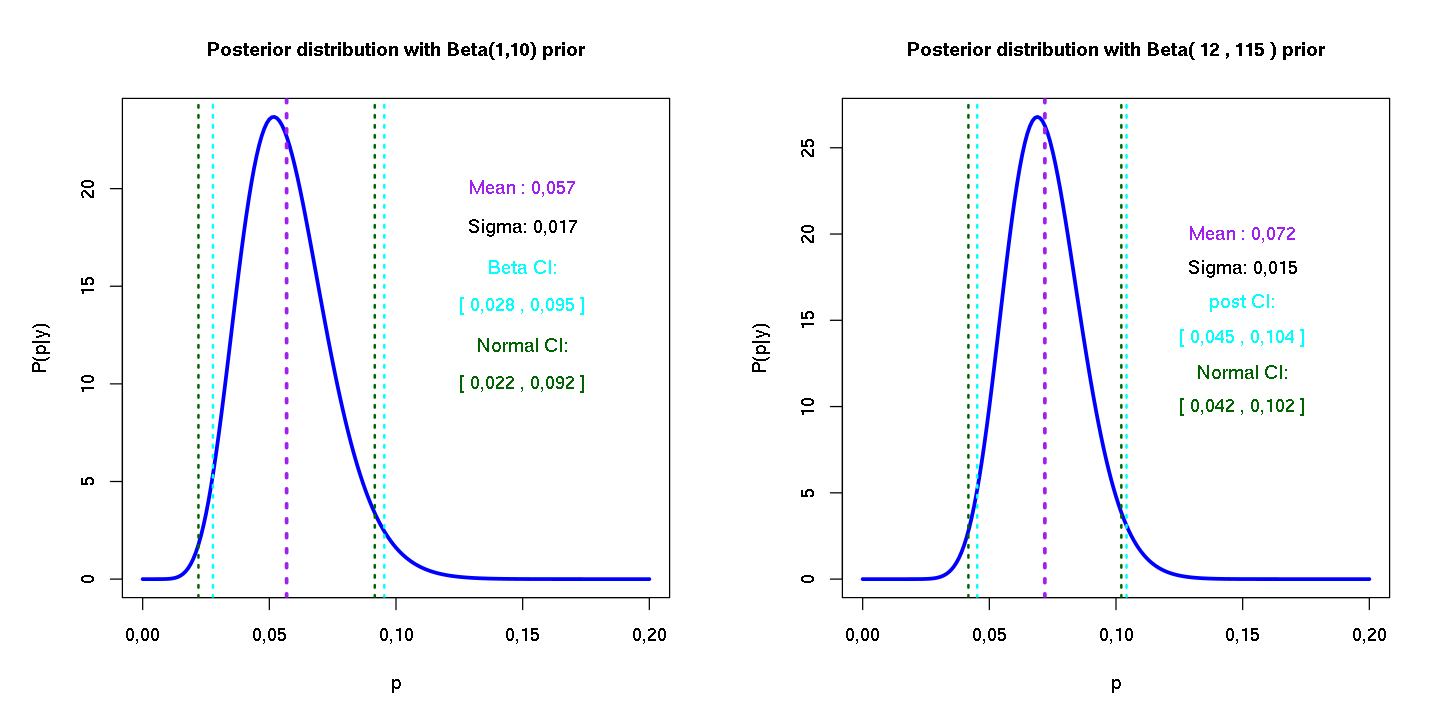

In [17]:
par(cex.lab=1, cex.axis=1, cex.main=1, mar=c(5, 5, 4, 2) + 0.1)
options(repr.plot.width=12,repr.plot.height=6)
area <- matrix (c(1,2), nrow=1, ncol=2, byrow=TRUE)
layout(area)

#estimation with B(1,10) prior
p_beta <- (a_beta)/(a_beta+b_beta) #posterior mean
var_beta <- a_beta*b_beta/((a_beta+b_beta)^2*(a_beta+b_beta+1))
p_low_beta <- qbeta(0.025, a_beta,b_beta)
p_high_beta <- qbeta(0.975, a_beta,b_beta)
p_low_norm_beta  <- p_beta-2*sqrt(var_beta)
p_high_norm_beta <- p_beta+2*sqrt(var_beta)

p <- seq(0,0.2, 0.001)
plot(p, dbeta(p, a_beta,b_beta), type='l', col='blue', lwd=3,
      main="Posterior distribution with Beta(1,10) prior", xlab="p", ylab="P(p|y)")
abline(v=p_high_beta, col='cyan', lwd=2, lty='dotted')
abline(v=p_low_beta , col='cyan', lwd=2, lty='dotted')
abline(v=p_high_norm_beta, col='dark green', lwd=2, lty='dotted')
abline(v=p_low_norm_beta , col='dark green', lwd=2, lty='dotted')
abline(v=p_beta, col='purple', lwd=3, lty='dotted')


text(0.15, 20, paste("Mean :", round(p_beta,3)), col='purple')
text(0.15, 18, paste("Sigma:", round(sqrt(var_beta),3)))
text(0.15, 16, "Beta CI:", col='cyan')
text(0.15, 14, paste("[", round(p_low_beta,3), ",",round(p_high_beta,3),"]"), col='cyan')
text(0.15, 12, "Normal CI:", col='dark green')
text(0.15, 10, paste("[", round(p_low_norm_beta,3), ",",round(p_high_norm_beta,3),"]"), col='dark green')

p_post <- (a_post)/(a_post+b_post) #posterior mean
var_post <- a_post*b_post/((a_post+b_post)^2*(a_post+b_post+1))
p_low_post <- qbeta(0.025, a_post,b_post)
p_high_post <- qbeta(0.975, a_post,b_post)
p_low_norm_post  <- p_post-2*sqrt(var_post)
p_high_norm_post <- p_post+2*sqrt(var_post)

p <- seq(0,0.2, 0.001)
plot(p, dbeta(p, a_post,b_post), type='l', col='blue', lwd=3,
      main=paste("Posterior distribution with Beta(",a1,",",b1,") prior"), xlab="p", ylab="P(p|y)")
abline(v=p_high_post, col='cyan', lwd=2, lty='dotted')
abline(v=p_low_post , col='cyan', lwd=2, lty='dotted')
abline(v=p_high_norm_post, col='dark green', lwd=2, lty='dotted')
abline(v=p_low_norm_post , col='dark green', lwd=2, lty='dotted')
abline(v=p_post, col='purple', lwd=3, lty='dotted')


text(0.15, 20, paste("Mean :", round(p_post,3)), col='purple')
text(0.15, 18, paste("Sigma:", round(sqrt(var_post),3)))
text(0.15, 16, "post CI:", col='cyan')
text(0.15, 14, paste("[", round(p_low_post,3), ",",round(p_high_post,3),"]"), col='cyan')
text(0.15, 12, "Normal CI:", col='dark green')
text(0.15, 10, paste("[", round(p_low_norm_post,3), ",",round(p_high_norm_post,3),"]"), col='dark green')


**(h)** test the hypotesis $H_0: p = 0.1$ versus $ H_1 : p \neq 0.1$ at $5\%$ level of significance with both the frequentist and bayesian approach

Like in point **d)** for the frequentist approach we can define the null hypothesis distribution Binom$(y|n=165, p=0.1)$ and see if the observed value lies within the acceptance region, while for the bayesian approach we have to check if the hypothesis lies within the credibility interval for both the posterior distribution obtained.

[1] "Frequentist rejection zone: y<= 9  U y>= 24"


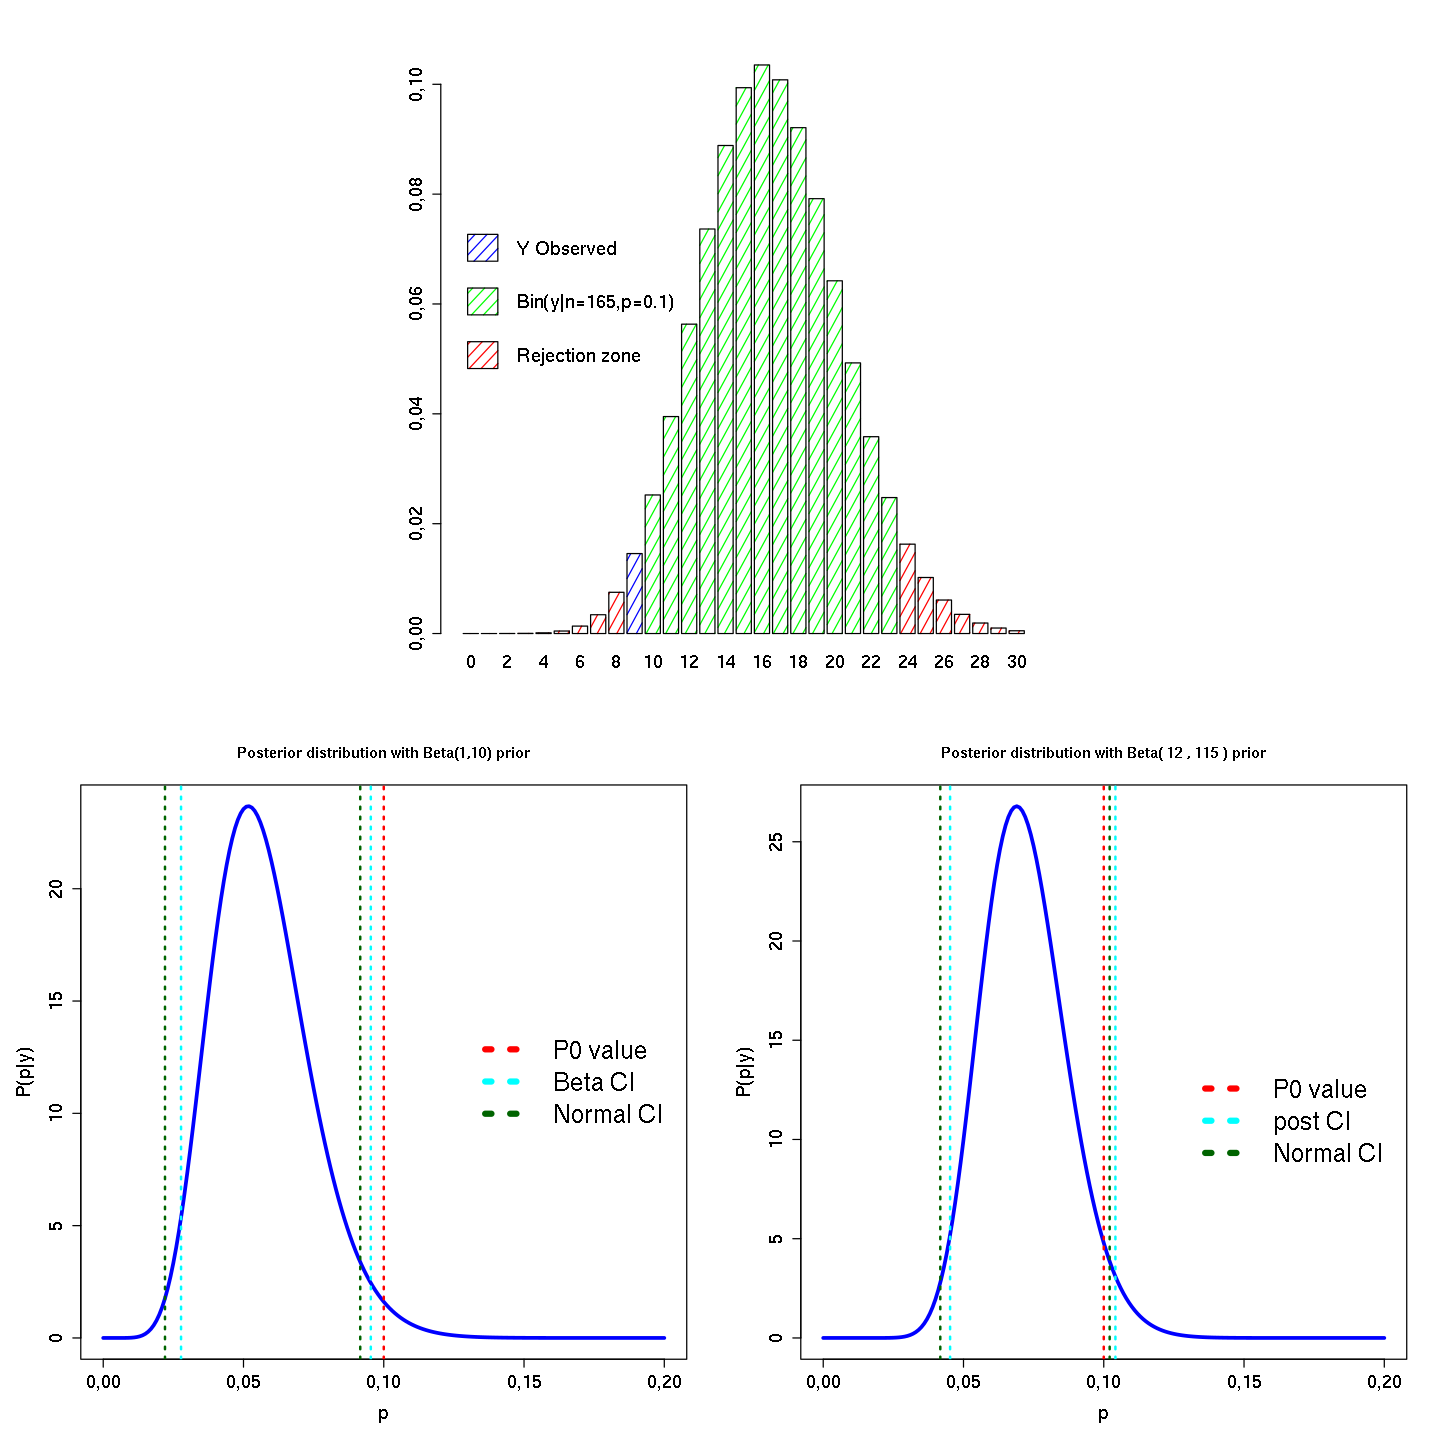

In [18]:
p0 <-0.1
rej_low <-  qbinom(0.025, n, p0)
rej_high <- qbinom(0.975, n, p0)
print(paste("Frequentist rejection zone: y<=", rej_low," U y>=",rej_high ))

plot_max <- 30
cols <- rep('green', plot_max+1) #i plot only up to 20
cols <- replace(cols, c(seq(1, rej_low+1,1), seq(rej_high+1, plot_max+1)), 'red')
cols <- replace(cols, y+1, 'blue')

par(cex.lab=1.5, cex.axis=1.5, cex.main=1, mar=c(5, 5, 4, 2) + 0.1)
options(repr.plot.width=12,repr.plot.height=12)
area <- matrix (c(0,1,1,0,2,2,3,3), nrow=2, ncol=4, byrow=TRUE)
layout(area)

ys <- seq(0,plot_max,1)
barplot(dbinom(ys, n, p0), names.arg=ys, col=cols, density=30, angle=60)
legend(-2,0.08, legend=c("Y Observed", "Bin(y|n=165,p=0.1)", "Rejection zone"),
       bty='n', fill=c('blue', 'green', 'red'), x.intersp=0.5, density=30, cex=1.5 )

plot(p, dbeta(p, a_beta,b_beta), type='l', col='blue', lwd=3, cex.lab=1.5,
      main="Posterior distribution with Beta(1,10) prior", xlab="p", ylab="P(p|y)")
abline(v=p_high_beta, col='cyan', lwd=2, lty='dotted')
abline(v=p_low_beta , col='cyan', lwd=2, lty='dotted')
abline(v=p_high_norm_beta, col='dark green', lwd=2, lty='dotted')
abline(v=p_low_norm_beta, col='dark green', lwd=2, lty='dotted')
abline(v=p0, col='red', lwd=2, lty='dotted')
legend(0.12, 15, legend=c("P0 value","Beta CI", "Normal CI"),
       bty='n', col=c('red', 'cyan', 'dark green'), lty='dotted', 
       cex=1.8, seg.len =1, lwd=5, x.intersp=0.5, y.intersp=0.5 )

plot(p, dbeta(p, a_post,b_post), type='l', col='blue', lwd=3, cex.lab=1.5,
      main=paste("Posterior distribution with Beta(",a1,",",b1,") prior"), xlab="p", ylab="P(p|y)")
abline(v=p_high_post, col='cyan', lwd=2, lty='dotted')
abline(v=p_low_post , col='cyan', lwd=2, lty='dotted')
abline(v=p_high_norm_post, col='dark green', lwd=2, lty='dotted')
abline(v=p_low_norm_post, col='dark green', lwd=2, lty='dotted')
abline(v=p0, col='red', lwd=2, lty='dotted')
legend(0.12, 15, legend=c("P0 value","post CI", "Normal CI"),
       bty='n', col=c('red', 'cyan', 'dark green'), lty='dotted', 
       cex=1.8, seg.len =1, lwd=5, x.intersp=0.5, y.intersp=0.5 )

From this plot we can see for both the frequentist and the Bayesian with Beta(1,10) prior approach the $H_0$ hypothesis value is respectively outside the acceptance region and credibility interval so we have to reject the hypothesis.

Using the old posterior as prior however the hypothesis cannot be rejected since it lies within the 95% credibility interval computed either with the normal approximation or the beta distribution integral.